In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#!unzip "/content/drive/MyDrive/Dog-vision multi classification/dog-breed-identification.zip"

# End to End Multi-Class Dog 🐶 breed Classification

This Notebook builds an end-to-end multiclass image classifier using Tensorflow2.0 and Tensorflowhub

## 1.Problem

Identifying the breed of a dog given an image of a dog, while sitting at a cafe, and i take a photo of a dog, i want to be able to know what breed the dog is

## 2.Data

The data i am using is from Kaggle's dog breed identification

https://www.kaggle.com/competitions/dog-breed-identification/data

## 3 Evaluation

The Evaluation is  file with Prediction probabilities for each dog breed of each test image

https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation

## 4. Features

Some Information about the Data:
- We are dealing with images(Unstructured Data) so it's probably best to use deep learning/transfer learning.
- There are 120 breeds of dogs (This means there are 120 different classes)
- There are around 10,000+ images in training set (These images have labels)
- There are around 10,000+ images on the test set(These have no labels because that is what we want to predict)


## Getting Workspace ready 

- Import Tensorflow 2.x ✅
- Import Tensorflow Hub ✅
- Make sure we use GPU ✅


In [1]:
#import necessary tools
import tensorflow as tf
import tensorflow_hub as hub
print("TF Version:" , tf.__version__)
print("TF HUB Version:",hub.__version__)

#check GPU availability
print("GPU","available (Yess!!)" if tf.config.list_physical_devices("GPU") else "not available")

TF Version: 2.8.2
TF HUB Version: 0.12.0
GPU available (Yess!!)


In [2]:
#checkout the labels of our data
import pandas as pd
labels_csv=pd.read_csv("/content/drive/MyDrive/Dog-vision multi classification/labels.csv")
print(labels_csv.describe())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126


In [3]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [4]:
#how many images are there of each breed
labels_csv["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

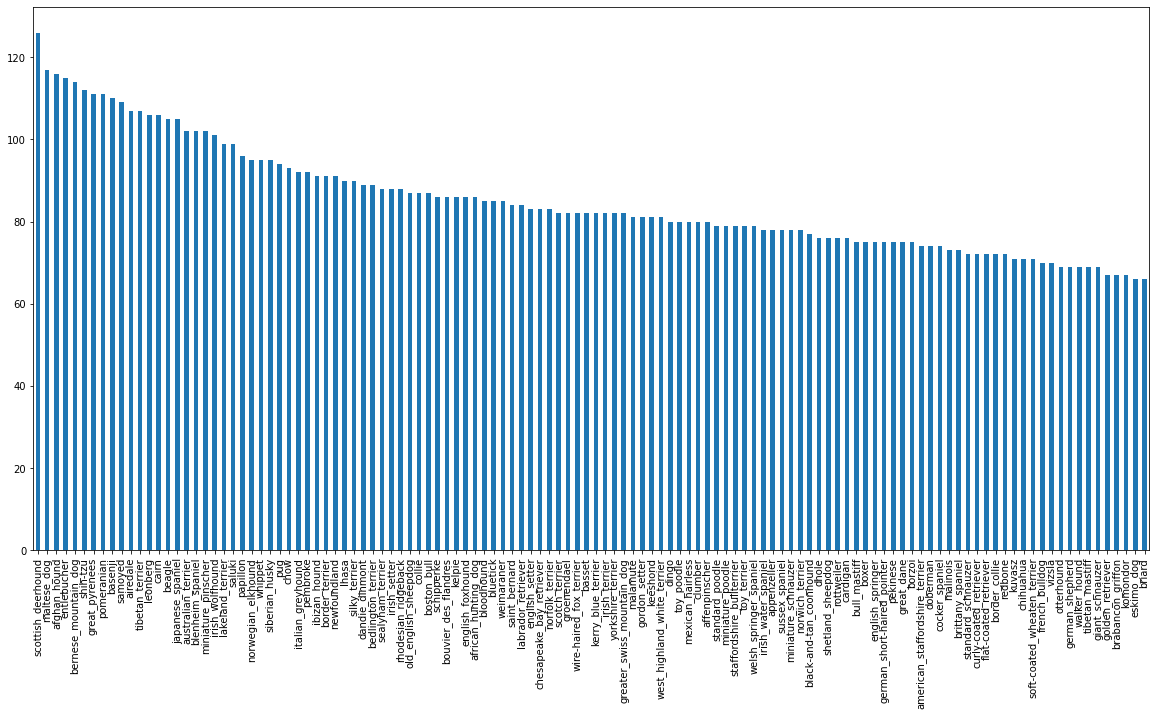

In [5]:
#visualize it
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10));

In [6]:
#checking the median of the breed
labels_csv["breed"].value_counts().median()

82.0

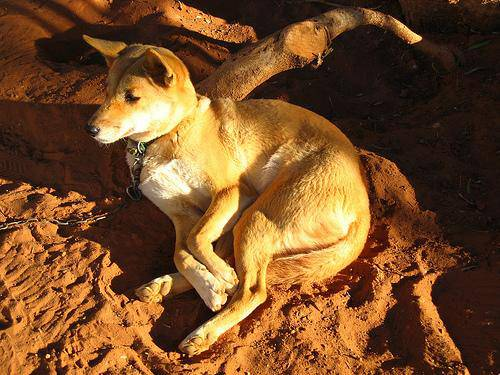

In [7]:
#lets view an image
from IPython.display import Image
Image("/content/drive/MyDrive/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

In [8]:
#create pathnames for image ID'S
filename=["/content/drive/MyDrive/train/" + fname + ".jpg" for fname in labels_csv["id"]]

#print the first 10
filename[:10]

['/content/drive/MyDrive/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [9]:
#check if filename matches train directory
import os
if len(os.listdir("/content/drive/MyDrive/train"))==len(filename):
  print("Filenames match train directory, proceed")
else:
  print("Filenames do not match")

Filenames match train directory, proceed


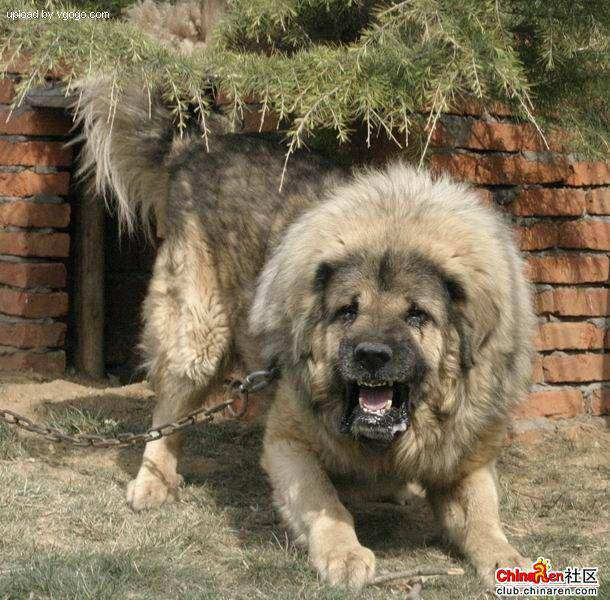

In [10]:
#check one more
from IPython.display import Image
Image(filename[9000])

In [11]:
labels_csv["breed"][9000]

'tibetan_mastiff'

  **Since we have our training imge filepaths in a list, lets prepare our labels**

In [12]:
import numpy as np
labels=labels_csv["breed"]
labels=np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [13]:
len(labels)

10222

In [14]:
#see if labels matches the filename
if len(labels)==len(filename):
  print("No of labels matches number of filename")
else:
  print("No of labels do not match")

No of labels matches number of filename


In [15]:
#find no of unique breeds
unique_breeds=np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [16]:
len(unique_breeds)

120

In [17]:
#Turn a single label into an array of booleans
print(labels[0])
labels[0]==unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [18]:
#turn every label into a boolean array
boolean_labels=[labels==unique_breeds for labels in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [19]:
 #Example: Turning boolean array into integers
 print(labels[0]) #original label
 print(np.where(labels[0]==unique_breeds)) #index where label occurs
 print(boolean_labels[0].argmax()) #index where label occurs in the boolean array
 print(boolean_labels[0].astype(int)) #convert the index to 1 where it appears on the boolean array

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [20]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [21]:
filename[:10]

['/content/drive/MyDrive/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [22]:
boolean_labels[:1]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False])]

### Creating our own validation set

Since the data set from kaggle does not come with a validation set, we would create our own

In [24]:
#setup X and y variables
X=filename
y=boolean_labels

In [25]:
#Experiment on 1000 images, set up images for experimenting
NUM_IMAGES=1000 #@param{type:"slider",min:1000,max:10000,step:1000}

In [26]:
#split data into train and valid
import sklearn
from sklearn.model_selection import train_test_split

#split them into training and validation of total size NUM_IMAGES
X_train,X_val,y_train,y_val=train_test_split(X[:NUM_IMAGES],
                                             y[:NUM_IMAGES],
                                             test_size=0.2,
                                             random_state=42)

In [27]:
len(X_train),len(y_train),len(X_val),len(y_val)

(800, 800, 200, 200)

In [28]:
#lets look at some of them
X_train[:5], y_train[:2]

(['/content/drive/MyDrive/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/MyDrive/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  '/content/drive/MyDrive/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  '/content/drive/MyDrive/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  '/content/drive/MyDrive/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, Fal

### Preprocessing Images

To preprocess our images into tensors, we're going to write a function which does a few things
- Takes an image filepath as input
- Use Tensorflow to read the file and save it to a variable `image`
- Turn our image(jpg) into tensors
- Resize the image to be a shape of (224,224)
- Run the modified image

**Before we do this lets see what importing an image looks like**

In [29]:
#convert an image into a numpy array
from matplotlib.pyplot import imread
image=imread(filename[42])
image.shape

(257, 350, 3)

**This is the height, width and color channel respectively**

In [30]:
#color channel=RGB having the color effect of the image
image.max(), image.min()

(255, 0)

In [31]:
image

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  53],
        [ 97,  88,  49],
        [120, 111,  72]]

In [32]:
#turn the images into tensors
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  5

**Now we have seen what an image looks like in tensors, lets make a function to preprocess them**

- Takes an image filepath as input
- Use Tensorflow to read the file and save it to a variable image
- Turn our image(jpg) into tensors
- Normalize the image(convert color channels from 0-255 to 0-1)
- Resize the image to be a shape of (224,224)
- Run the modified image


In [46]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

### Turning our data into batches:
Why turn our data into batches?

Let's say you are trying to process 10,000+ images in one go... they all might not fit into memory

so that's wy we do about 32 images at a time(this is the batch size, and you can manually adjust batch size if need be).

In order to use Tensorflow effectively, we need our data in the form of Tensor tuples which looks like this: `(image,label)`

In [47]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the assosciated label,
  processes the image and reutrns a typle of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [48]:
#demo of the above
(process_image(X[42]),tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we have a wy to turn our data into tuples of Tensors in the form `(image label)`. Let's make a function to turn all of our data(X and y) into batches of size 32

In [49]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [37]:
#create training n validation data batches
train_data=create_data_batches(X_train,y_train)
val_data=create_data_batches(X_val,y_val,valid_data=True)

Creating training data batches...
Creating validation data batches...


In [50]:
#check out different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

### Visualizing Data Batches 
Our data is now in batches, however these can be a little hard to understand/comprehend, lets visualize them!

In [39]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image 
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

In [40]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

to convert it into iterator >>> train_data.as_numy_iterator()
next takes an iterator. But it also returns next item from iterator and unpacks it

In [41]:
train_images,train_labels=next(train_data.as_numpy_iterator())
train_images,train_labels

(array([[[[0.27860272, 0.399261  , 0.34768537],
          [0.29090554, 0.4093659 , 0.3703388 ],
          [0.30614907, 0.4138721 , 0.3920976 ],
          ...,
          [0.70980394, 0.7607844 , 0.8862746 ],
          [0.70980394, 0.7607844 , 0.8862746 ],
          [0.70980394, 0.7607844 , 0.8862746 ]],
 
         [[0.5710848 , 0.66698813, 0.6628215 ],
          [0.29059702, 0.3860659 , 0.38849297],
          [0.22411723, 0.30753568, 0.3258655 ],
          ...,
          [0.7131303 , 0.76411074, 0.88960093],
          [0.7131303 , 0.76411074, 0.88960093],
          [0.7131303 , 0.76411074, 0.88960093]],
 
         [[0.45910546, 0.52281344, 0.5748071 ],
          [0.13038144, 0.19429952, 0.2514614 ],
          [0.1884611 , 0.2502608 , 0.31034485],
          ...,
          [0.7176471 , 0.7686275 , 0.8941177 ],
          [0.7176471 , 0.7686275 , 0.8941177 ],
          [0.7176471 , 0.7686275 , 0.8941177 ]],
 
         ...,
 
         [[0.69528306, 0.7073038 , 0.51607275],
          [0.70512

In [42]:
len(train_images),len(train_labels)

(32, 32)

In [42]:
#now lets visualize the data in the training batch
#train_images, train_labels=next(train_data.as_numpy_iterator())
#show_25_images(train_images, train_labels)

In [43]:
#visualize for validation data
#val_images, val_labels=next(val_data.as_numpy_iterator())
#show_25_images(val_images,val_labels)

### Building a model

Before we build a model, few things need to be defined:
- The input shape(our images shape, in the form of Tensors) to our model
- The output shape(image labels, in the form of Tensors) for our model
- The URL of the model we want to use from Tensorflow hub

In [43]:
IMG_SIZE=244

In [51]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds) # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL='https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5'

Now we have our input and output model ready to go, let's put them together in Keras deep learning model.

Knowing this, we will create a function that:
- Takes input shape, output shape, and model we have chosen
- Defines the layers in a keras model in sequential form(eg:do this first,then this, then that. building layer by layer)
- Compiles the model(says how it should be evaluated and improved)
- Builds the model(tells the model the input shape it would be getting)
- returns the model


All of these steps can be found: https://www.tensorflow.org/guide/keras/sequential_model

In [52]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
  print("building model with:  ",model_url)
  #setup the model layer
  model=tf.keras.Sequential([
              hub.KerasLayer(model_url),    #layer1 Input layer
              tf.keras.layers.Dense(units=output_shape,
                                    activation='softmax')    #layer 2 Output layer
  ])
  #Complie the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=['accuracy']
      )
  #build the model
  model.build(input_shape)
  return model
#lets run the model
model=create_model()

building model with:   https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_1 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


### Creating Callbacks
Call backs are helper functions a model can use during training to do such things as save its progress, check its progress, or stop training early if a moddel stops improving

We'll create two callbacks, one for Tensorbaord which helps track ur model progress and another for early stopping which prevents model for training for too long

To set up a Tensorboard callback we need to do three 3 things
1. Load the Tensorboard notebook extension
2. Create a Tensorboard callback which is able to save logs to a directory and pass it to our model's `fit()` funnction
3. Visualize our models training logs with the `%tensorboard` magic function (do this after model training)

In [54]:
#load tensorboard notebook extension
%load_ext tensorboard

In [55]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("/content/drive/MyDrive/Dog-vision multi classification/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)


### Creating Early Stopping callbacks
Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping


In [56]:
#create early stopping call backs to prevent overfitting
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3) #STOPS AFTER 3 ROUNDS OF NO IMPROVEMENT

### Training our Deep Neural Network
Train the model on a subset of Data: Our first model is only going to train on 1000 imaages to make sure everything is working

In [57]:
#set up epochs: This is how many classes of the data we want our model to do
NUM_EPOCHS=100#@param{type:"slider", min:10 , max:100, step:10}

lets create a function that trains a model
- Create a model using create_model()
- set up Tensorboard callback using `create_tensorboard_callback()`
- call the fit() function on our model passing it the training data, validation data, number of epochs to train(NUM_EPOCHS) and the call back we like to use
- Return the model

In [58]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model

In [59]:
#fit the model to the data
model=train_model()

building model with:   https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
25/25 [==============================] - 130s 5s/step - loss: 4.5665 - accuracy: 0.1000 - val_loss: 3.5635 - val_accuracy: 0.2200
Epoch 2/100
25/25 [==============================] - 4s 151ms/step - loss: 1.6389 - accuracy: 0.6837 - val_loss: 2.2465 - val_accuracy: 0.5000
Epoch 3/100
25/25 [==============================] - 3s 130ms/step - loss: 0.5526 - accuracy: 0.9425 - val_loss: 1.7701 - val_accuracy: 0.5950
Epoch 4/100
25/25 [==============================] - 3s 131ms/step - loss: 0.2472 - accuracy: 0.9862 - val_loss: 1.5872 - val_accuracy: 0.6200
Epoch 5/100
25/25 [==============================] - 4s 152ms/step - loss: 0.1454 - accuracy: 0.9950 - val_loss: 1.4995 - val_accuracy: 0.6350
Epoch 6/100
25/25 [==============================] - 3s 131ms/step - loss: 0.0982 - accuracy: 1.0000 - val_loss: 1.4547 - val_accuracy: 0.6350
Epoch 7/100
25/25 [=============================

Looks like the model is overfitting, what can we do to prevent overfitting in deep learning neural networks
Note: Overfitting is a good thing, it means our model is learning

### Checking the Tensorboard logs
The Tensorboard magic function (`%tensorboard`) will access the log directory we created earlier and visualize its content

In [62]:
%tensorboard -- logdir /content/drive/My\Drive/Dog-\vision multi classification/logs

ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--reuse_port BOOL] [--load_fast {false,auto,true}]
                   [--extra_data_server_flags EXTRA_DATA_SERVER_FLAGS]
                   [--grpc_creds_type {local,ssl,ssl_dev}]
                   [--grpc_data_provider PORT] [--purge_orphaned_data BOOL]
                   [--db URI] [--db_import] [--inspect] [--version_tb]
                   [--tag TAG] [--event_file PATH] [--path_prefix PATH]
                   [--window_title TEXT] [--max_reload_threads COUNT]
                   [--reload_interval SECONDS] [--reload_task TYPE]
                   [--reload_multifile BOOL]
                   [--reload_multifile_inactive_secs SECONDS]
                   [--generic_data TYPE]
                   [--samples_per_plugin SAMPLES_PER_PLUGIN]
                   [-

### Making and evluating predictions using a trained model

In [63]:
val_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [65]:
#make predictions on the val_data
predictions=model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 1s 142ms/step


array([[1.37243909e-03, 5.26005279e-05, 1.99399749e-03, ...,
        1.66532758e-04, 2.30388705e-05, 1.13906933e-03],
       [2.22447608e-03, 1.32906993e-04, 9.17528989e-04, ...,
        1.93786633e-04, 5.88554330e-03, 2.92308599e-04],
       [7.12390029e-05, 1.35936367e-03, 2.26818174e-05, ...,
        1.94307184e-04, 1.81138894e-04, 2.13934598e-03],
       ...,
       [2.28413392e-05, 4.08752239e-05, 8.34105012e-05, ...,
        2.67643991e-05, 7.37550377e-04, 1.19019904e-04],
       [2.45064916e-03, 2.95132893e-04, 4.80780509e-05, ...,
        2.89489399e-04, 9.65427171e-05, 7.69800693e-03],
       [2.75317689e-05, 1.32502737e-05, 2.67231488e-04, ...,
        3.77845904e-03, 4.33713431e-04, 5.12496081e-05]], dtype=float32)

In [66]:
predictions[0]

array([1.37243909e-03, 5.26005279e-05, 1.99399749e-03, 1.95606699e-04,
       2.16250963e-04, 1.03611164e-05, 2.11296082e-02, 1.18582917e-03,
       2.14991698e-04, 7.84399104e-04, 6.34575845e-04, 5.92972538e-05,
       3.24373686e-04, 1.01384860e-04, 1.97542668e-03, 1.79370967e-04,
       4.64580262e-05, 3.92566532e-01, 2.67918549e-05, 1.76702102e-04,
       1.01936166e-03, 1.12337271e-04, 1.07468826e-04, 2.43574637e-03,
       9.41415419e-05, 1.73645501e-04, 1.91931203e-01, 3.72385111e-04,
       5.67015959e-04, 5.66570525e-05, 7.51433836e-04, 6.47001900e-04,
       2.78372923e-03, 5.50321420e-06, 5.21783542e-04, 3.29718217e-02,
       9.47464014e-06, 8.65890688e-05, 2.63708771e-05, 1.65112171e-04,
       3.31566669e-04, 8.25640382e-06, 9.14851626e-05, 4.68233811e-05,
       5.74942496e-05, 1.13514798e-04, 2.40692505e-04, 2.11397404e-04,
       1.93201285e-03, 1.50273147e-04, 2.14493426e-04, 2.60040251e-04,
       2.37729793e-04, 1.40290882e-04, 4.35730763e-05, 5.73593570e-05,
      

In [70]:
#check index value for unique breeds
index= 42
print(predictions[index])
print(f"Max value(probability of prediction): {np.max(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[7.21221368e-05 4.84393568e-05 1.08647901e-05 1.41501805e-05
 1.88416918e-03 1.43618336e-05 7.32956250e-05 3.93923750e-04
 3.36233992e-03 1.92274898e-02 1.38512914e-05 6.27811687e-06
 5.44815965e-04 3.74481711e-03 5.10359649e-04 1.68185635e-03
 1.06297603e-05 7.97697503e-05 8.96639394e-05 2.18585468e-04
 1.74124089e-05 1.33566253e-04 1.28180254e-05 6.44583997e-05
 2.28077779e-03 3.61132261e-05 3.11335025e-05 8.61504668e-05
 1.22744736e-04 1.29294176e-05 2.63651218e-05 2.22234557e-05
 3.63860127e-05 1.47427390e-05 1.08318956e-04 2.41304997e-06
 9.48457964e-05 5.14345011e-05 3.88373555e-05 7.66070485e-02
 3.54731055e-05 9.13634085e-06 2.91057071e-03 3.18677235e-06
 1.31981215e-04 6.92106005e-06 9.26394277e-05 2.12463856e-04
 4.02854821e-05 5.01136747e-05 3.75562486e-05 7.53738786e-05
 5.19113237e-05 6.85171690e-04 7.30779675e-06 2.36428416e-04
 3.86537831e-05 2.30170208e-05 1.51732875e-05 8.94821915e-06
 1.64286248e-05 1.09812361e-04 8.42079316e-07 2.38212178e-05
 9.88342344e-06 8.541988

In [71]:
unique_breeds[113]

'walker_hound'

Having the the above functionality is great but we want to be able to do it at scale.

And it would be even better if we could see the image the prediction is being made on!

Note: Prediction probabilities are also known as confidence levels.

In [73]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

'border_terrier'

In [74]:
val_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

Since our data is in a batch, we would have to unbatchify it so we can make predictions on the validation image and then compare it to the the validation label(truth labels)

In [75]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and reutrns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

Now we've got ways to get get:

- Prediction labels
- Validation labels (truth labels)
- Validation images

Let's make some function to make these all a bit more visaulize.

We'll create a function which:

- Takes an array of prediction probabilities, an array of truth labels and an array of images and an integer. ✅
- Convert the prediction probabilities to a predicted label. ✅
- Plot the predicted label, its predicted probability, the truth label and the target image on a single plot. ✅

In [81]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  
  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

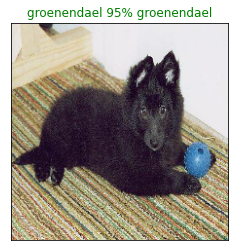

In [84]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=77)

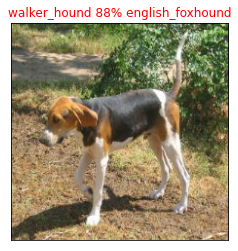

In [86]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=42)

Now we've got one function to visualize our models top prediction, let's make another to view our models top 10 predictions.

This function will:

- Take an input of prediction probabilities array and a ground truth array and an integer ✅
- Find the prediction using get_pred_label() ✅
- Find the top 10:
 - Prediction probabilities indexes ✅
 - Prediction probabilities values ✅
 - Prediction labels ✅
- Plot the top 10 prediction probability values and labels, coloring the true label green ✅

In [87]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  
  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

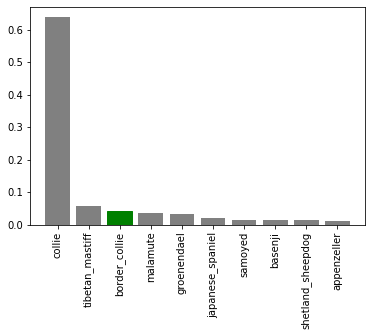

In [88]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

Now we've got some function to help us visualize our predictions and evaluate our modle, let's check out a few

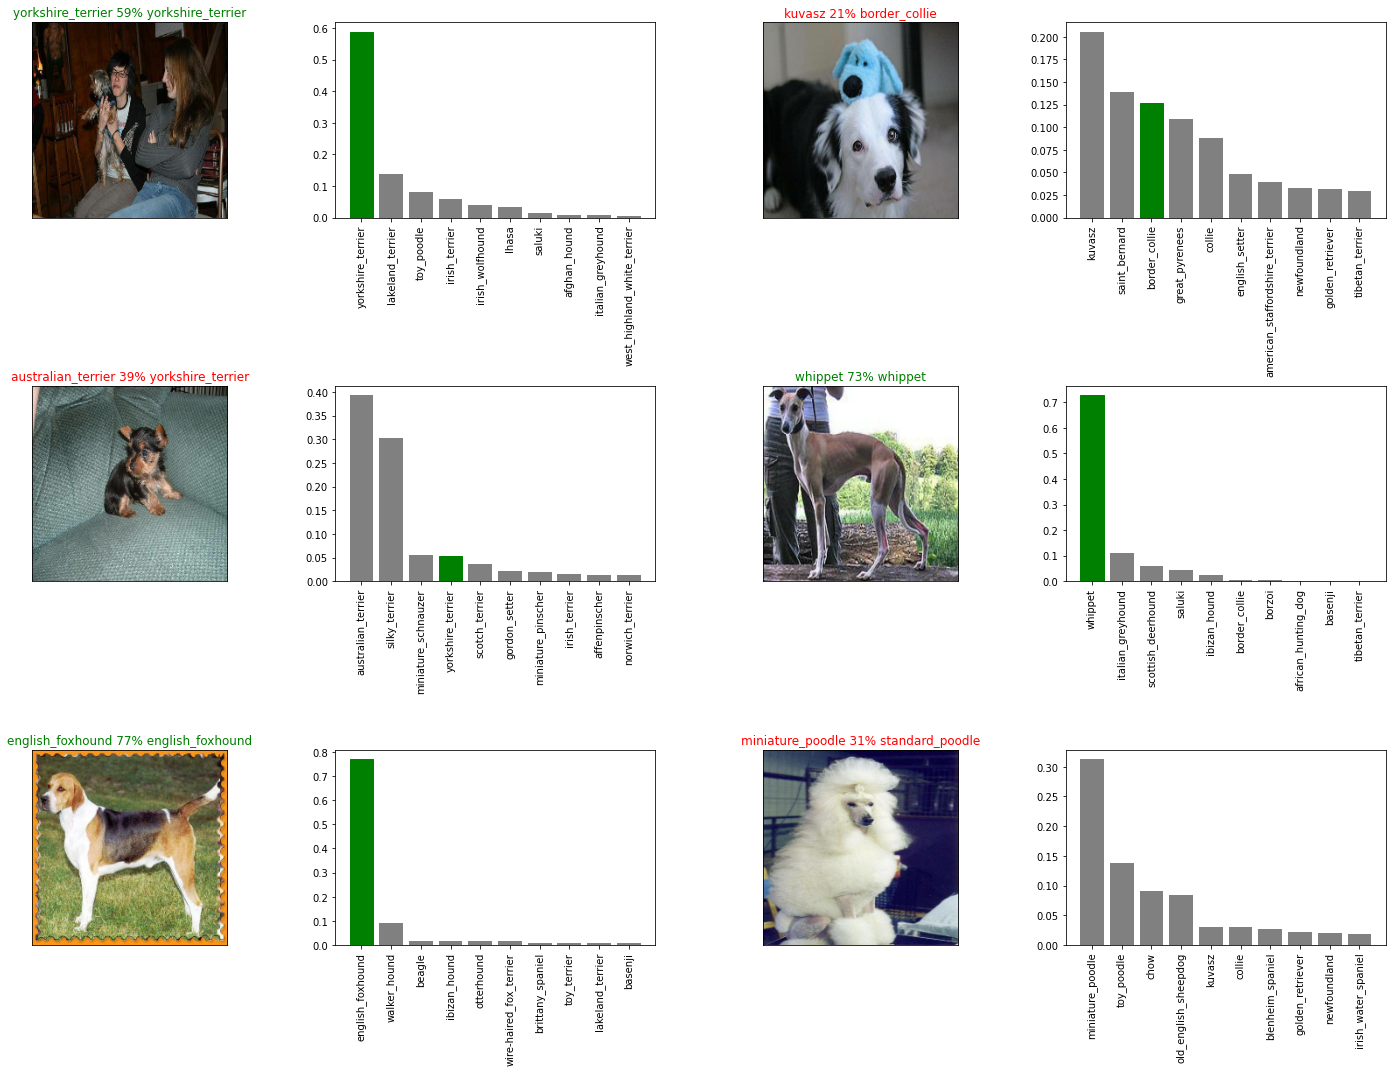

In [90]:
# Let's check out a few predictions and their different values
i_multiplier = 10
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

### Saving and Reloading a trained Model

In [91]:
# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("/content/drive/MyDrive/Dog-vision multi classification/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [92]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path, 
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

Now we've got functions to save and load a trained model, let's make sure they work!

In [93]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")

Saving model to: /content/drive/MyDrive/Dog-vision multi classification/models/20221001-12311664627466-1000-images-mobilenetv2-Adam.h5...


'/content/drive/MyDrive/Dog-vision multi classification/models/20221001-12311664627466-1000-images-mobilenetv2-Adam.h5'

In [94]:
# Load a trained model
loaded_1000_image_model = load_model('/content/drive/MyDrive/Dog-vision multi classification/models/20221001-12311664627466-1000-images-mobilenetv2-Adam.h5')

Loading saved model from: /content/drive/MyDrive/Dog-vision multi classification/models/20221001-12311664627466-1000-images-mobilenetv2-Adam.h5


In [95]:
# Evaluate the pre-saved model
model.evaluate(val_data)


7/7 [==============================] - 1s 91ms/step - loss: 1.3228 - accuracy: 0.6700


[1.3228027820587158, 0.6700000166893005]

In [96]:
# Evaluate the loaded model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 2s 152ms/step - loss: 1.3228 - accuracy: 0.6700


[1.3228027820587158, 0.6700000166893005]

### Training a big dog model 🐶 (on the full data)

In [97]:
len(X), len(y)

(10222, 10222)

In [99]:
# Create a data batch with the full data set
full_data = create_data_batches(X, y)

Creating training data batches...


In [100]:
full_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [101]:
# Create a model for full model
full_model = create_model()

building model with:   https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [102]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [103]:
# Fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 972s 3s/step - loss: 1.3516 - accuracy: 0.6668
Epoch 2/100
320/320 [==============================] - 36s 114ms/step - loss: 0.4078 - accuracy: 0.8777
Epoch 3/100
320/320 [==============================] - 37s 117ms/step - loss: 0.2395 - accuracy: 0.9364
Epoch 4/100
320/320 [==============================] - 37s 115ms/step - loss: 0.1555 - accuracy: 0.9617
Epoch 5/100
320/320 [==============================] - 37s 114ms/step - loss: 0.1071 - accuracy: 0.9784
Epoch 6/100
320/320 [==============================] - 36s 113ms/step - loss: 0.0787 - accuracy: 0.9866
Epoch 7/100
320/320 [==============================] - 36s 112ms/step - loss: 0.0585 - accuracy: 0.9920
Epoch 8/100
320/320 [==============================] - 39s 121ms/step - loss: 0.0462 - accuracy: 0.9947
Epoch 9/100
320/320 [==============================] - 37s 117ms/step - loss: 0.0389 - accuracy: 0.9953
Epoch 10/100
320/320 [==============================] - 37s 115ms/

In [117]:
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

Saving model to: /content/drive/MyDrive/Dog-vision multi classification/models/20221001-14001664632853-full-image-set-mobilenetv2-Adam.h5...


'/content/drive/MyDrive/Dog-vision multi classification/models/20221001-14001664632853-full-image-set-mobilenetv2-Adam.h5'

In [118]:
# Load in the full model
loaded_full_model = load_model('/content/drive/MyDrive/Dog-vision multi classification/models/20221001-13221664630567-full-image-set-mobilenetv2-Adam.h5')

Loading saved model from: /content/drive/MyDrive/Dog-vision multi classification/models/20221001-13221664630567-full-image-set-mobilenetv2-Adam.h5


### Making predictions on the test dataset
Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

Luckily we created create_data_batches() earlier which can take a list of filenames as input and conver them into Tensor batches.

To make predictions on the test data, we'll:

- Get the test image filenames. ✅
- Convert the filenames into test data batches using create_data_batches() and setting the test_data parameter to True (since the test data doesn't have labels). ✅
- Make a predictions array by passing the test batches to the predict() method called on our model.

In [129]:
# Load test image filenames
test_path = "/content/drive/MyDrive/Dog-vision multi classification/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['/content/drive/MyDrive/Dog-vision multi classification/test/e7be7b911a4cba9fdfa4105ec4776370.jpg',
 '/content/drive/MyDrive/Dog-vision multi classification/test/e823ee1ca007c88600806925a6f2bce1.jpg',
 '/content/drive/MyDrive/Dog-vision multi classification/test/e7a1b7a42db97df750aeae212a02d9c4.jpg',
 '/content/drive/MyDrive/Dog-vision multi classification/test/e7b608110b0e29120d8740f37e85f3d0.jpg',
 '/content/drive/MyDrive/Dog-vision multi classification/test/e783e22d4f370b6cc0b1f44b4d6584a8.jpg',
 '/content/drive/MyDrive/Dog-vision multi classification/test/e79030be9c9769f3604474aea16039bd.jpg',
 '/content/drive/MyDrive/Dog-vision multi classification/test/e7b4b0e7d7d76f8dbd64920f34443b25.jpg',
 '/content/drive/MyDrive/Dog-vision multi classification/test/e7afb35b8252782013a6700e28e327fa.jpg',
 '/content/drive/MyDrive/Dog-vision multi classification/test/e78d3997b4e7f4abc1299f81b8e3b2d9.jpg',
 '/content/drive/MyDrive/Dog-vision multi classification/test/e774fbfeb4b712ca042f93edea383

In [130]:
len(test_filenames)

10377

In [131]:
#Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [132]:
test_data

<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

Note: Calling `predict()` on our full model and passing it the test data batch will take a long time to run (about a ~1hr). This is because we have to process ~10,000+ images and get our model to find patterns in those images and generate predictions based on what its learned in the training dataset.

In [133]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

325/325 [==============================] - 174s 524ms/step


In [137]:
# Save predictions (NumPy array) to csv file (for access later)
np.savetxt("/content/drive/MyDrive/Dog-vision multi classification/preds_array.csv", test_predictions, delimiter=",")

In [139]:
# Load predictions (NumPy array) from csv file
test_predictions = np.loadtxt("/content/drive/MyDrive/Dog-vision multi classification/preds_array.csv", delimiter=",")

In [140]:
test_predictions[:10]

array([[3.63969690e-08, 3.34450306e-06, 2.37179663e-07, ...,
        2.49758784e-07, 2.59155564e-09, 7.06669283e-08],
       [1.17220438e-08, 1.35249111e-05, 1.86086666e-08, ...,
        1.67801446e-07, 4.36560214e-02, 1.11110228e-06],
       [3.59261620e-10, 4.64229055e-09, 5.12304019e-11, ...,
        3.74867748e-10, 7.00473493e-06, 3.36118383e-10],
       ...,
       [4.81260830e-11, 2.26142785e-10, 1.27440092e-09, ...,
        7.27928884e-10, 1.40659814e-03, 1.11172078e-11],
       [5.70287684e-09, 2.83900914e-13, 8.70236772e-09, ...,
        2.78409157e-10, 1.26662179e-12, 3.14174797e-09],
       [2.82121810e-08, 1.16424270e-09, 4.68869978e-11, ...,
        5.55198255e-07, 2.80120639e-05, 2.20236558e-08]])

In [141]:
test_predictions.shape

(10377, 120)

### Preparing test dataset predictions for Kaggle
Looking at the Kaggle sample submission, we find that it wants our models prediction probaiblity outputs in a DataFrame with an ID and a column for each different dog breed. https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

To get the data in this format, we'll:

- Create a pandas DataFrame with an ID column as well as a column for each dog breed. ✅
- Add data to the ID column by extracting the test image ID's from their filepaths.
- Add data (the prediction probabilites) to each of the dog breed columns.
- Export the DataFrame as a CSV to submit it to Kaggle.

In [142]:
# Create a pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [149]:
test_filenames[:10]

['/content/drive/MyDrive/Dog-vision multi classification/test/e7be7b911a4cba9fdfa4105ec4776370.jpg',
 '/content/drive/MyDrive/Dog-vision multi classification/test/e823ee1ca007c88600806925a6f2bce1.jpg',
 '/content/drive/MyDrive/Dog-vision multi classification/test/e7a1b7a42db97df750aeae212a02d9c4.jpg',
 '/content/drive/MyDrive/Dog-vision multi classification/test/e7b608110b0e29120d8740f37e85f3d0.jpg',
 '/content/drive/MyDrive/Dog-vision multi classification/test/e783e22d4f370b6cc0b1f44b4d6584a8.jpg',
 '/content/drive/MyDrive/Dog-vision multi classification/test/e79030be9c9769f3604474aea16039bd.jpg',
 '/content/drive/MyDrive/Dog-vision multi classification/test/e7b4b0e7d7d76f8dbd64920f34443b25.jpg',
 '/content/drive/MyDrive/Dog-vision multi classification/test/e7afb35b8252782013a6700e28e327fa.jpg',
 '/content/drive/MyDrive/Dog-vision multi classification/test/e78d3997b4e7f4abc1299f81b8e3b2d9.jpg',
 '/content/drive/MyDrive/Dog-vision multi classification/test/e774fbfeb4b712ca042f93edea383

In [150]:
# Append test image ID's to predictions DataFrame
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"] = test_ids

In [151]:
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e7be7b911a4cba9fdfa4105ec4776370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e823ee1ca007c88600806925a6f2bce1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e7a1b7a42db97df750aeae212a02d9c4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e7b608110b0e29120d8740f37e85f3d0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e783e22d4f370b6cc0b1f44b4d6584a8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e7be7b911a4cba9fdfa4105ec4776370,3.639697e-08,3.344503e-06,2.371797e-07,1.465226e-07,7.270370e-10,3.213686e-09,5.117726e-10,5.672193e-09,3.354187e-10,...,8.231514e-10,4.304493e-12,1.513893e-11,5.195397e-09,3.724803e-11,1.256530e-11,1.322373e-09,2.497588e-07,2.591556e-09,7.066693e-08
1,e823ee1ca007c88600806925a6f2bce1,1.172204e-08,1.352491e-05,1.860867e-08,7.855221e-04,8.467435e-10,8.139598e-08,1.677924e-06,2.167148e-06,2.994498e-09,...,1.047875e-05,3.983129e-06,2.507646e-07,1.489521e-08,4.292593e-10,4.651539e-06,4.673178e-07,1.678014e-07,4.365602e-02,1.111102e-06
2,e7a1b7a42db97df750aeae212a02d9c4,3.592616e-10,4.642291e-09,5.123040e-11,1.761598e-09,7.780719e-10,2.147781e-12,1.206901e-11,1.176500e-09,3.843303e-10,...,1.788298e-10,2.044201e-11,2.689517e-11,1.396838e-09,1.262567e-12,9.622787e-12,4.047957e-06,3.748677e-10,7.004735e-06,3.361184e-10
3,e7b608110b0e29120d8740f37e85f3d0,5.968742e-08,2.485152e-13,6.944006e-11,1.142814e-10,1.133864e-09,1.327643e-10,6.701933e-12,2.739800e-10,1.471105e-12,...,7.971413e-12,1.779974e-10,2.338294e-11,1.531934e-09,8.359030e-10,1.381600e-10,1.098559e-10,7.001219e-11,5.164443e-11,1.101525e-09
4,e783e22d4f370b6cc0b1f44b4d6584a8,1.428835e-08,1.110933e-11,3.825502e-09,1.920592e-09,1.727715e-07,1.413355e-08,7.807303e-12,1.330743e-09,1.572853e-11,...,2.077804e-09,5.251720e-09,2.496078e-08,9.359444e-11,2.971370e-09,1.189158e-11,4.620326e-10,4.202589e-06,1.036142e-10,4.941830e-10


In [153]:
# Save our predictions dataframe to CSV for submission to Kaggle
preds_df.to_csv("/content/drive/MyDrive/Dog-vision multi classification/full_model_predictions_submission_1_mobilenetV2.csv",
                index=False)

### Making predictions on custom images
To make predictions on custom images, we'll:

- Get the filepaths of our own images.
- Turn the filepaths into data batches using create_data_batches(). And since our custom images won't have labels, we set the test_data parameter to True.
- Pass the custom image data batch to our model's predict() method.
- Convert the prediction output probabilities to predictions labels.
- Compare the predicted labels to the custom images.

In [179]:
# Get custom image filepaths
custom_path = "/content/drive/MyDrive/Dog-vision multi classification/dog-photos/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [180]:
custom_image_paths

['/content/drive/MyDrive/Dog-vision multi classification/dog-photos/dog photos2.jfif',
 '/content/drive/MyDrive/Dog-vision multi classification/dog-photos/dog photos 3.jfif']

In [181]:
# Turn custom images into batch datasets 
custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

Creating test data batches...


<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [182]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

In [183]:
custom_preds.shape

(2, 120)

In [184]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['afghan_hound', 'weimaraner']

In [185]:
# Get custom images (our unbatchify() function won't work since there aren't labels... maybe we could fix this later)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

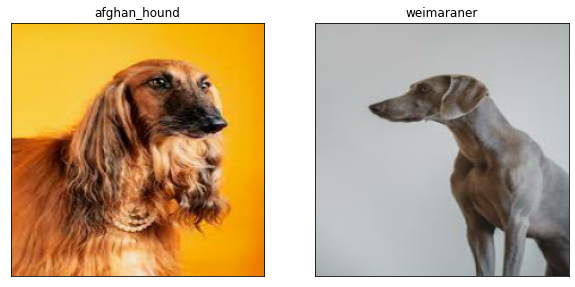

In [187]:
# Check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 2, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)